In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 3
sns.set()

In [2]:
import requests

def fetch():
    path = r'D:\Programing\python_projects\machine_learning_algorithm\data_set\nba.csv'
    if not os.path.exists(path):
        url = 'https://stats.nba.com/stats/leaguegamelog/'
        params = (
            ('Counter', '0'),
            ('DateFrom', ''),
            ('DateTo', ''),
            ('Direction', 'ASC'),
            ('LeagueID', '00'),
            ('PlayerOrTeam', 'T'),
            ('Season', '2017-18'),
            ('SeasonType', 'Regular Season'),
            ('Sorter', 'DATE'),
        )
        headers = {
            'User-Agent': 'PostmanRuntime/7.4.0'
        }
        response = requests.get(url, params=params, headers=headers)
        data = response.json()['resultSets'][0]
        df = pd.DataFrame(data=data['rowSet'], columns=data['headers'])
        df.to_csv(path, index=False)
        return df
    else:
        return pd.read_csv(path)
    
df = fetch()
orig = df.copy()

In [4]:
df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,1610612744,GSW,Golden State Warriors,21800002,2018-10-16,GSW vs. OKC,W,240,42,...,41,58,28,7,7,21,29,108,8,1
1,22018,1610612760,OKC,Oklahoma City Thunder,21800002,2018-10-16,OKC @ GSW,L,240,33,...,29,45,21,12,6,15,21,100,-8,1
2,22018,1610612755,PHI,Philadelphia 76ers,21800001,2018-10-16,PHI @ BOS,L,240,34,...,41,47,18,8,5,16,20,87,-18,1
3,22018,1610612738,BOS,Boston Celtics,21800001,2018-10-16,BOS vs. PHI,W,240,42,...,43,55,21,7,5,15,20,105,18,1
4,22018,1610612750,MIN,Minnesota Timberwolves,21800010,2018-10-17,MIN @ SAS,L,240,39,...,32,46,20,9,2,11,27,108,-4,1


In [6]:
df['WON']=df['WL']
df['WON']=df['WON'].replace('W', 1)
df['WON']=df['WON'].replace('L', 0)
df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,WON
0,22018,1610612744,GSW,Golden State Warriors,21800002,2018-10-16,GSW vs. OKC,W,240,42,...,58,28,7,7,21,29,108,8,1,1
1,22018,1610612760,OKC,Oklahoma City Thunder,21800002,2018-10-16,OKC @ GSW,L,240,33,...,45,21,12,6,15,21,100,-8,1,0
2,22018,1610612755,PHI,Philadelphia 76ers,21800001,2018-10-16,PHI @ BOS,L,240,34,...,47,18,8,5,16,20,87,-18,1,0
3,22018,1610612738,BOS,Boston Celtics,21800001,2018-10-16,BOS vs. PHI,W,240,42,...,55,21,7,5,15,20,105,18,1,1
4,22018,1610612750,MIN,Minnesota Timberwolves,21800010,2018-10-17,MIN @ SAS,L,240,39,...,46,20,9,2,11,27,108,-4,1,0


In [7]:
df = df[["TEAM_NAME", "GAME_ID", "PTS", "WON"]]
df.head(5)

,TEAM_NAME,GAME_ID,PTS,WON
0,Golden State Warriors,21800002,108,1
1,Oklahoma City Thunder,21800002,100,0
2,Philadelphia 76ers,21800001,87,0
3,Boston Celtics,21800001,105,1
4,Minnesota Timberwolves,21800010,108,0


In [8]:
df.iloc[0, :]

TEAM_NAME    Golden State Warriors
GAME_ID                   21800002
PTS                            108
WON                              1
Name: 0, dtype: object

In [9]:
# will make our figures later look nicer
df = df.sort_values("PTS")

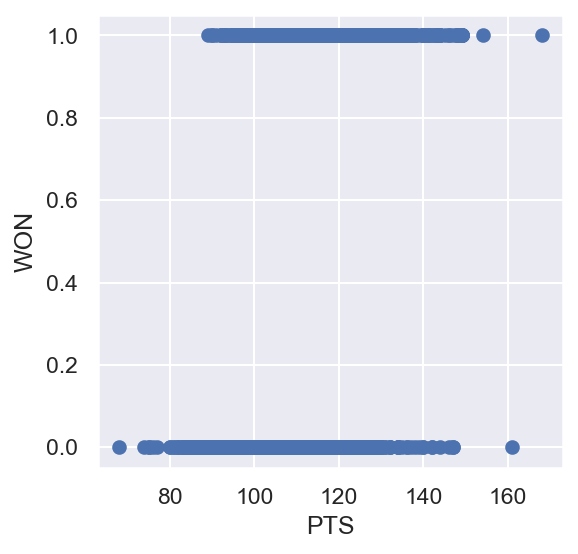

In [10]:
plt.plot(df["PTS"], df["WON"], 'o')
plt.xlabel("PTS")
plt.ylabel("WON") 
plt.savefig('WON_vs_PTS.png', dpi = 300, bbox_inches = "tight")